In [1]:
'''General Header for Python Operations'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os

# set graphics and print options
plt.style.use('ggplot')
np.set_printoptions(precision=3)

# hide warnings
warnings.filterwarnings('ignore')


In [2]:
# Import Datasets
f_name = 'sensor.csv'
raw_data = pd.read_csv(f_name)
raw_data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Data Cleaning

In [3]:
# Drop junk columns
raw_data.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
# examine NA's
N = raw_data.shape[0]
print(N)
for col,na_cnt in enumerate(raw_data.isna().sum()):
    print(f'Column: {raw_data.columns[col]}, NA Count: {na_cnt}, Percent NA: {na_cnt/N*100}')

220320
Column: timestamp, NA Count: 0, Percent NA: 0.0
Column: sensor_00, NA Count: 10208, Percent NA: 4.633260711692085
Column: sensor_01, NA Count: 369, Percent NA: 0.16748366013071894
Column: sensor_02, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_03, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_04, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_05, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_06, NA Count: 4798, Percent NA: 2.177741466957153
Column: sensor_07, NA Count: 5451, Percent NA: 2.474128540305011
Column: sensor_08, NA Count: 5107, Percent NA: 2.3179920116194626
Column: sensor_09, NA Count: 4595, Percent NA: 2.0856027596223674
Column: sensor_10, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_11, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_12, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_13, NA Count: 19, Percent NA: 0.008623819898329702
Column: sensor_14, NA C

In [5]:
# drop columns with over 5% missing data
drop_cols = ['sensor_15','sensor_50','sensor_51']
df = raw_data.drop(columns=drop_cols)
df.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'machine_status'],
      dtype='object')

In [6]:
# convert time stamp to date time object and set as index
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index('timestamp',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 50 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_16       220289 non-null  float64
 16  sensor_17       220274

In [7]:
# Find Status Indicators
display(df.machine_status.unique())
display(df.machine_status.value_counts())

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [8]:
# Get binary dummy vals for machine status
df = df.join(pd.get_dummies(df.machine_status,prefix='STATUS_'),on='timestamp',how='inner')
df.head()


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status,STATUS__BROKEN,STATUS__NORMAL,STATUS__RECOVERING
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,0,1,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL,0,1,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL,0,1,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL,0,1,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL,0,1,0


In [9]:
# Drop values with recovering status as pump appears to be not running
df = df.loc[df.STATUS__RECOVERING != 1]

In [10]:
# use linear interpolation for remaining NA's
sensors = []
for col in df.columns:
    if 'sensor' in col:
        sensors.append(col)
df[sensors] = df[sensors].interpolate(method='linear')
df.isna().sum()

sensor_00             0
sensor_01             0
sensor_02             0
sensor_03             0
sensor_04             0
sensor_05             0
sensor_06             0
sensor_07             0
sensor_08             0
sensor_09             0
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             0
sensor_39             0
sensor_40             0
sensor_41             0
sensor_42       

## Engineer Features

In [11]:
import datetime as dt
forecast_window = dt.timedelta(days= 5) # assumes the pump is in failure mode prior to complete breakdown 7 days before catostrophic failure
feature_window = dt.timedelta(days = 5) # assume sensor data is only relavent to the currwent machine state for 30 days
target_window = dt.timedelta(days = 10) # period before the failure we'd like to be able to predict pending failure


In [12]:
# mark forecast window for failure and target window indicators
df['forecast_indicator'] = df.STATUS__BROKEN
df['target_indicator'] = df.STATUS__BROKEN
failure_dates = df.index[df.STATUS__BROKEN==1]


for date in failure_dates:
    
    # forecast indicator
    print('\nfailure date:',date)
    print('beginnng failure date:', date-forecast_window)
    failure_range = (df.index >= date-forecast_window) & (df.index <= date)
    failure_range = df.index[failure_range]
    print('forecast window begin and end dates:',min(failure_range),max(failure_range))
    df['forecast_indicator'].loc[failure_range] = 1
    
    #target window
    failure_range = (df.index >= date-target_window) & (df.index <= date)
    failure_range = df.index[failure_range]
    print('target window begin and end dates:',min(failure_range),max(failure_range))
    df['target_indicator'].loc[failure_range] = 1
    



failure date: 2018-04-12 21:55:00
beginnng failure date: 2018-04-07 21:55:00
forecast window begin and end dates: 2018-04-07 21:55:00 2018-04-12 21:55:00
target window begin and end dates: 2018-04-02 21:55:00 2018-04-12 21:55:00

failure date: 2018-04-18 00:30:00
beginnng failure date: 2018-04-13 00:30:00
forecast window begin and end dates: 2018-04-13 13:40:00 2018-04-18 00:30:00
target window begin and end dates: 2018-04-08 00:30:00 2018-04-18 00:30:00

failure date: 2018-05-19 03:18:00
beginnng failure date: 2018-05-14 03:18:00
forecast window begin and end dates: 2018-05-14 03:18:00 2018-05-19 03:18:00
target window begin and end dates: 2018-05-09 03:18:00 2018-05-19 03:18:00

failure date: 2018-05-25 00:30:00
beginnng failure date: 2018-05-20 00:30:00
forecast window begin and end dates: 2018-05-20 01:11:00 2018-05-25 00:30:00
target window begin and end dates: 2018-05-15 00:30:00 2018-05-25 00:30:00

failure date: 2018-06-28 22:00:00
beginnng failure date: 2018-06-23 22:00:00
fo

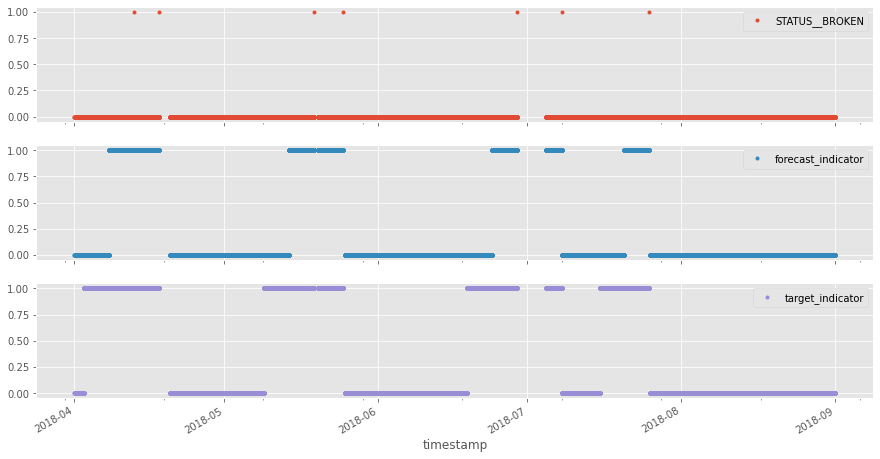

In [13]:
_=df[['STATUS__BROKEN','forecast_indicator','target_indicator']].plot(figsize=(15,8),subplots=True,marker='.',linestyle='None')

In [14]:
df.forecast_indicator.value_counts()

0    158767
1     47076
Name: forecast_indicator, dtype: int64

In [15]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,STATUS__BROKEN,STATUS__NORMAL,STATUS__RECOVERING,forecast_indicator,target_indicator
count,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,...,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.000000,205843.0,205843.000000,205843.000000
mean,2.420437,48.186290,51.636893,44.166968,625.663672,75.388813,13.864926,16.165907,15.478043,15.086584,...,43.783973,48.858442,45.047070,158.885860,58.570222,0.000034,0.999966,0.0,0.228699,0.368611
std,0.242638,2.246675,1.878307,1.668246,50.857103,9.384401,0.865803,0.601501,0.589581,0.573911,...,12.439357,14.677599,9.999353,78.707095,17.939513,0.005831,0.005831,0.0,0.419996,0.482429
min,0.000000,0.000000,37.413190,33.289930,2.798032,0.000000,0.014468,0.028935,0.028935,0.007234,...,27.199070,29.513889,28.935180,28.935180,29.224537,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.444734,46.701390,50.651040,43.142361,628.240700,70.501090,13.382520,15.950520,15.183740,15.053530,...,37.615740,41.087960,39.641200,92.592590,48.900460,0.000000,1.000000,0.0,0.000000,0.000000
50%,2.456539,48.263890,51.736111,44.357635,633.333313,75.648020,13.679110,16.167530,15.494790,15.082470,...,40.509260,45.138890,43.113426,146.122700,53.530090,0.000000,1.000000,0.0,0.000000,0.000000
75%,2.499826,49.565970,52.907986,45.355900,637.963000,80.601970,14.568870,16.427950,15.697340,15.118630,...,45.428240,51.793980,46.875000,213.252300,61.342594,0.000000,1.000000,0.0,0.000000,1.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,15.964990,19.133390,19.538480,18.988710,...,311.342600,370.370400,220.486100,561.632000,458.622700,1.000000,1.000000,0.0,1.000000,1.000000


In [16]:
# add fake high limit alarms
alarm_limit = 0.98 # top quantile
for sensor in sensors:
    col_nm = sensor+'_hi_alm'
    lmt = df[sensor].quantile(alarm_limit)
    df[col_nm] = df[sensor]>lmt
    df[col_nm] = df[col_nm].astype(int)

In [17]:
# add fake low limit alarms
alarm_limit = 0.02 # bottom quantile
for sensor in sensors:
    col_nm = sensor+'_lo_alm'
    lmt = df[sensor].quantile(alarm_limit)
    df[col_nm] = df[sensor]<lmt
    df[col_nm] = df[col_nm].astype(int)

In [18]:
# add rolling alarm sums
for col in df.columns:
    if '_alm' in col:
        df[col+'_rolling'] = df[col].rolling(window=f'{feature_window.days}D').sum()/float(feature_window.days)

In [19]:
X_col = []
for col in df.columns:
    if 'rolling' in col:
        X_col.append(col)
y_col = ['forecast_indicator']

In [20]:
top_ten_corr = df[X_col+y_col].corr().loc[X_col].abs()[y_col].sort_values(by=y_col,ascending=False).iloc[:10]
top_ten_corr

,forecast_indicator
sensor_49_lo_alm_rolling,0.475901
sensor_06_lo_alm_rolling,0.465625
sensor_48_lo_alm_rolling,0.397725
sensor_47_lo_alm_rolling,0.364988
sensor_05_hi_alm_rolling,0.358025
sensor_38_lo_alm_rolling,0.348829
sensor_43_lo_alm_rolling,0.338186
sensor_46_lo_alm_rolling,0.325398
sensor_10_lo_alm_rolling,0.322503
sensor_07_lo_alm_rolling,0.315889


## Build Models

In [21]:
# Split out Data
from sklearn.model_selection import train_test_split

X = df[list(top_ten_corr.index)].values
y = df[y_col].values
# Stratified test train split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15)
print(f'X Train {X_train.shape}')
print(f'X Test {X_test.shape}')
print(f'y Train {y_train.shape}')
print(f'y Test {y_test.shape}')


X Train (174966, 10)
X Test (30877, 10)
y Train (174966, 1)
y Test (30877, 1)


In [22]:
# Check Stratification Original Data was ~ 5% stroke victims
print(f'Full Dataset Failures {y.mean()*100:0.2f}%')
print(f'Test Set Failures {y_test.mean()*100:0.2f}%')
print(f'Train Set Failures {y_train.mean()*100:0.2f}%')

Full Dataset Failures 22.87%
Test Set Failures 22.87%
Train Set Failures 22.87%


In [23]:
# Over sample the minority
from imblearn.over_sampling import RandomOverSampler
resample = RandomOverSampler()
np.random.seed(42)
X_train_smpl, y_train_smpl = resample.fit_resample(X_train,y_train)
print(f'X Train Undersample {X_train_smpl.shape}')
print(f'y Train Undersample {y_train_smpl.shape}')
print()
print(f'y Train Undersample Set Failures {y_train_smpl.mean()*100:0.2f}%')

X Train Undersample (269904, 10)
y Train Undersample (269904,)

y Train Undersample Set Failures 50.00%


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score,\
recall_score,f1_score,confusion_matrix, plot_confusion_matrix


mdls = {#'lr': LogisticRegression(multi_class='ovr'),
        #'svc': SVC(decision_function_shape='ovr'),
        #'rf': RandomForestClassifier(n_jobs=-1),
        'xgb': XGBClassifier(n_jobs=-1,eval_metric='auc'),
        'gbc': GradientBoostingClassifier()
        }

prms = {#'lr': {'C': np.logspace(-4,4,9),
              #'penalty': ['l1','l2']},
        #'svc': {'C': np.logspace(-4,4,9)},
        #'rf': {'n_estimators': [2**i for i in range(3,8)],
               #'max_depth':  [8,16,32,64,None]},
        'xgb': {#'min_child_weight': [4,5],
                'gamma': [i/10.0 for i in range(3,6)],
                #'subsample': [i/10.0 for i in range(6,11)],
                #'colsample_bytree': [i/10.0 for i in range(6,11)],
                'max_depth': [2,4,None]},
        'gbc': {'n_estimators': [250,500],
                'max_depth':  [1,5,9],
                'learning_rate': [0.001,0.01,0.1]},
        }

In [28]:
from sklearn.model_selection import GridSearchCV
import joblib

def train_model(key,models,params):
    print('Training model: {}'.format(key))
    gs_cv = GridSearchCV(models[key],params[key], cv = 5,
                         scoring='roc_auc', n_jobs = -1, verbose=2)
    best_est = gs_cv.fit(X_train_smpl, y_train_smpl)
    print('Best Estimator: {}'.format(best_est.best_params_))
    print('Best Estimator Score: {}'.format(best_est.best_score_))
    joblib.dump(best_est.best_estimator_,'{}_tr.pkl'.format(key))

In [ ]:
for mname in mdls.keys():
    train_model(mname,mdls,prms)

Training model: xgb
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[08:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Estimator: {'gamma': 0.3, 'max_depth': None}
Best Estimator Score: 0.9994200850539684
Training model: gbc
Fitting 5 folds for each of 18 candidates, totalling 90 fits


Training model: lr
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Estimator: {'C': 0.001, 'penalty': 'l2'}
Best Estimator Score: 0.9453768328770888

Training model: rf
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Estimator: {'max_depth': 32, 'n_estimators': 16}
Best Estimator Score: 0.9994215840382846

Training model: xgb
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Estimator: {'gamma': 0.3, 'max_depth': None}
Best Estimator Score: 0.9994200850539684

Training model: gbc
Fitting 5 folds for each of 18 candidates, totalling 90 fits